In [1]:
# importing all libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder, MinMaxScaler

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [2]:
# loading the data
data = pd.read_csv(r"C:\Users\amit9\Downloads\archive\Mall_Customers.csv")
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


# Data Preprocessing

In [3]:
# converting 'Male' to 0 and Female to 1 in gender column
data['Gender'] = data['Gender'].map({"Male" : 0,
                                    "Female" : 1})

In [4]:
# checking if it worked or not
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,0,19,15,39
1,2,0,21,15,81
2,3,1,20,16,6
3,4,1,23,16,77
4,5,1,31,17,40


In [5]:
# getting the important features/ inputs
#X = data.drop('CustomerID', axis = 1)
X = data[['Annual Income (k$)', 'Spending Score (1-100)']]

In [6]:
# object of MinMaxScaler
mn = MinMaxScaler()

# scaling the input data
X = mn.fit_transform(X)

In [7]:
X[0:5]

array([[0.        , 0.3877551 ],
       [0.        , 0.81632653],
       [0.00819672, 0.05102041],
       [0.00819672, 0.7755102 ],
       [0.01639344, 0.39795918]])

# Machine Learning

In [8]:
# calculating the inertia for the number of clusters/ categories from 1 to 10
inertia_lst = []

# running a loop for the number of clusters
for i in range(1,11,1):
    # creating model
    clf = KMeans(n_clusters = i, n_init = 15)
    # training the model
    clf.fit(X)
    # calculating the inertia and storing it in inertia_lst list
    inertia_lst.append(clf.inertia_)

C:\Users\amit9\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\amit9\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\amit9\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\amit9\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Window

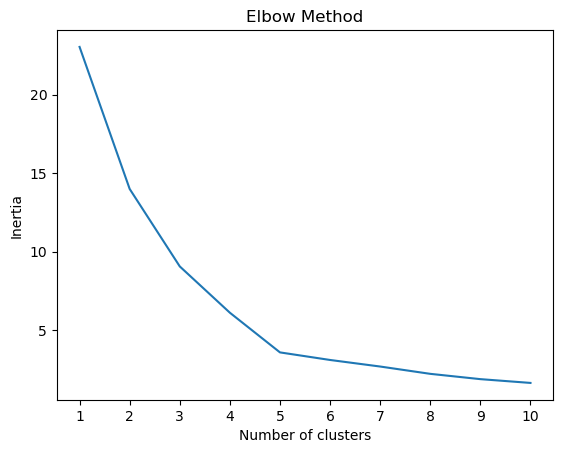

In [9]:
# elbow method - it is simply where there is a bend in the plot are the possible number of optimal clusters one can make in this data

# creating a line plot where axis represents: x - number of clusters, y - inertia
plt.plot(np.arange(1,11,1), inertia_lst)
plt.xticks(np.arange(1,11,1))
plt.xlabel("Number of clusters")
plt.ylabel("Inertia")

plt.title("Elbow Method")
plt.show()

In [10]:
# creating the model with the task of dividing in 2 categories
clf_2 = KMeans(n_clusters=2, n_init= 10)

In [11]:
# creating the model with the task of dividing in 4 categories
clf_4 = KMeans(n_clusters=4, n_init= 10)

In [12]:
# training the "clf_2" model
clf_2.fit(X)

C:\Users\amit9\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=2, n_init=10)

In [13]:
# training the "clf_4" model
clf_4.fit(X)

C:\Users\amit9\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=4, n_init=10)

In [14]:
# getting the output (i.e. the category in which each row is divided) for "clf_2" model
clf_2.labels_

array([0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1])

In [15]:
# getting the output (i.e. the category in which each row is divided) for "clf_4" model
clf_4.labels_

array([0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2])

# Accuracy

In [16]:
# calculating accuracy of clf_2 model
acc_2 = silhouette_score(X, clf_2.labels_)
acc_2

0.33340205479521

In [17]:
# calculating accuracy of clf_4 model
acc_4 = silhouette_score(X, clf_4.labels_)
acc_4

0.49620078745146784

<Axes: xlabel='Gender', ylabel='Spending Score (1-100)'>

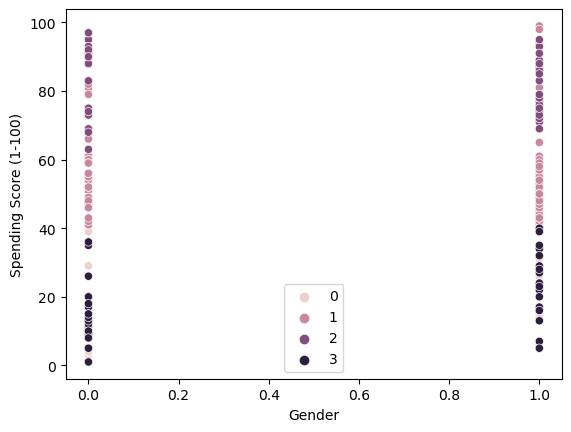

In [18]:
# reprenting the data clustering using a scatter plot
import seaborn as sns
sns.scatterplot(data = data, x = 'Gender', y = 'Spending Score (1-100)', hue = clf_4.labels_)